import the required libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor
from sklearn.metrics import RocCurveDisplay,roc_auc_score,accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix,auc, roc_curve
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor


The dataset comprises information gathered from rentberry.com, a platform facilitating apartment rentals in various cities.</br> The data encompasses details of available apartments for rent across 20 different cities worldwide, including but not limited to Austin, Ottawa, Japan,Tokyo,etc.

Each entry in the dataset includes the following fields:

City: The name of the city where the apartment is located.</br>
Apartment Name: The designated name or identifier of the apartment.</br>
Address: The address of the apartment.</br>
Upload Date: The date when the apartment listing was uploaded for rent.</br>
State Code: The state code or equivalent geographical identifier (where applicable) extracted from the address.</br>
Bedrooms: The number of bedrooms in the apartment.</br>
Bathrooms: The number of bathrooms in the apartment.</br>
Area (sqft): The total area of the apartment in square feet.</br>
Pets Allowed: Indicates whether pets( cats/dogs ) are allowed in the apartment .</br>
Deposit: The amount of deposit required for renting the apartment.</br>
Facilities: A list of facilities provided by the apartment, such as parking, AC , Storage etc.</br>
</br>
The dataset aims to provide comprehensive information for prospective renters interested in exploring available apartments across different cities, assisting them in making informed decisions based on various criteria such as location, amenities, and rental terms.

 # Exploratory Data Analysis

load the dataset

In [2]:
df=pd.read_csv('rent_data.csv')
df.shape

(6354, 20)

In [3]:
df.head()

,Unnamed: 0,Sl No,city,country,name,address,date,state_code,price,bed,bath,area,pet,deposit,ac,parking,dishwasher,fireplace,storage,hardwood_floor
0,0,314.0,toronto,Canada,Holistic Zen Home Share,"20 Brockton Ave, Toronto, ON M6K 1S5, Canada",01/31/24,ON,99744,1,2.0,NaN,Allowed,99600.0,Unavailable,Unavailable,Unavailable,Unavailable,Unavailable,Unavailable
1,1,315.0,toronto,Canada,"Cozy Studio Apartment In Toronto, Near Osgoode...","Studio 2, 199 Richmond Street West, Old Toront...",08/26/20,ON,211956,Studio,1.0,441,NaN,99600.0,Unavailable,Unavailable,Unavailable,Unavailable,Unavailable,Unavailable
2,2,316.0,toronto,Canada,Sunny & Spacious 1-Bedroom Apartment In Toront...,"University Plaza, Richmond Street West, Old To...",08/26/20,ON,224424,1,1.0,614,NaN,99600.0,Unavailable,Unavailable,Unavailable,Unavailable,Unavailable,Unavailable
3,3,317.0,toronto,Canada,"Nice & Bright 1-Bedroom In Toronto, Near Osgoo...","University Plaza, Richmond Street West, Old To...",08/26/20,ON,224424,1,1.0,581,NaN,99600.0,Unavailable,Unavailable,Unavailable,Unavailable,Unavailable,Unavailable
4,4,318.0,toronto,Canada,Super Modern & Comfy 1-Bedroom Apartment With ...,"University Plaza, Richmond Street West, Old To...",08/26/20,ON,245204,2,1.0,646,NaN,99600.0,Unavailable,Unavailable,Unavailable,Unavailable,Unavailable,Unavailable


In [4]:
df.isna().sum()

Unnamed: 0           0
Sl No              440
city                 0
country              0
name                 0
address              0
date                20
state_code        1382
price                0
bed                  0
bath               473
area              2957
pet               5284
deposit           5826
ac                   0
parking              0
dishwasher           0
fireplace            0
storage              0
hardwood_floor       0
dtype: int64

breif information of our dataset 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6354 entries, 0 to 6353
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6354 non-null   int64  
 1   Sl No           5914 non-null   float64
 2   city            6354 non-null   object 
 3   country         6354 non-null   object 
 4   name            6354 non-null   object 
 5   address         6354 non-null   object 
 6   date            6334 non-null   object 
 7   state_code      4972 non-null   object 
 8   price           6354 non-null   int64  
 9   bed             6354 non-null   object 
 10  bath            5881 non-null   float64
 11  area            3397 non-null   object 
 12  pet             1070 non-null   object 
 13  deposit         528 non-null    float64
 14  ac              6354 non-null   object 
 15  parking         6354 non-null   object 
 16  dishwasher      6354 non-null   object 
 17  fireplace       6354 non-null   o

we observe that there are a lot of null values and difference found in the data types

check for duplicates !!

In [6]:
df.duplicated().sum()

0

drop unwanted columns

In [7]:
df = df.drop(columns=['date','Sl No','Unnamed: 0'])

data cleaning

In [8]:
df.loc[df['city'] == 'Austin', 'state_code'] = df.loc[df['city'] == 'Austin', 'state_code'].fillna('TX')
df.loc[df['city']=='dallas','state_code']=df.loc[df['city']=='dallas','state_code'].fillna('TX')
df.loc[df['city'] == 'brisbane', 'state_code'] = df.loc[df['city'] == 'brisbane', 'state_code'].fillna('QLD')
df.loc[df['city'] == 'buffalo', 'state_code'] = df.loc[df['city'] == 'buffalo', 'state_code'].fillna('NY')
df.loc[df['city'] == 'glasgow', 'state_code'] = df.loc[df['city'] == 'glasgow', 'state_code'].fillna('UK')
df.loc[df['city'] == 'las-vegas', 'state_code'] = df.loc[df['city'] == 'las-vegas', 'state_code'].fillna('NV')
df.loc[df['city'] == 'melbourne', 'state_code'] = df.loc[df['city'] == 'melbourne', 'state_code'].fillna('VIC')
df.loc[df['city'] == 'miami', 'state_code'] = df.loc[df['city'] == 'miami', 'state_code'].fillna('FL')
df.loc[df['city'] == 'new-jersey', 'state_code'] = df.loc[df['city'] == 'new-jersey', 'state_code'].fillna('NJ')
df.loc[df['city'] == 'perth', 'state_code'] = df.loc[df['city'] == 'perth', 'state_code'].fillna('WA')
df.loc[df['city'] == 'sydney', 'state_code'] = df.loc[df['city'] == 'sydney', 'state_code'].fillna('NSW')
df.loc[df['city'] == 'toronto', 'state_code'] = df.loc[df['city'] == 'toronto', 'state_code'].fillna('ON')
df.loc[df['city'] == 'orlando', 'state_code'] = df.loc[df['city'] == 'orlando', 'state_code'].fillna('FL')
df.loc[df['state_code'] == 'Germany', 'state_code'] = 'GD'
df.loc[df['bed'] == 'studio', 'bed'] = 0

In [9]:
df.loc[df['bed'] == 'studio', 'bed'] = '0'  # Replace 'studio' with '0' as string
df['bed'] = pd.to_numeric(df['bed'], errors='coerce').fillna(0).astype(int)

In [10]:
df['area'] = df['area'].str.replace(',', '') 
df['area'] = pd.to_numeric(df['area'], errors='coerce').fillna(0).astype(int)

filling up the missing values

In [11]:
df['state_code'].fillna(df['state_code'].mode()[0], inplace=True)
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['pet'].fillna('not allowed', inplace=True)

In [12]:
ccol = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",ccol)
print("\n")

ncol = df.select_dtypes(include=['int64','int32','float64']).columns
print("Numerical columns are:",ncol)


Categorical columns are: Index(['city', 'country', 'name', 'address', 'state_code', 'pet', 'ac',
       'parking', 'dishwasher', 'fireplace', 'storage', 'hardwood_floor'],
      dtype='object')


Numerical columns are: Index(['price', 'bed', 'bath', 'area', 'deposit'], dtype='object')


In [13]:
to_impute = ['area','deposit','bath']
i_i = IterativeImputer()
df[to_impute] = i_i.fit_transform(df[to_impute])

In [14]:
df.isna().sum()

city              0
country           0
name              0
address           0
state_code        0
price             0
bed               0
bath              0
area              0
pet               0
deposit           0
ac                0
parking           0
dishwasher        0
fireplace         0
storage           0
hardwood_floor    0
dtype: int64

In [15]:
for i in df.select_dtypes(include='object').columns:
    print(i)
    print('\n')
    print(df[i].value_counts())
    

city


city
vancouver     440
orlando       440
new-jersey    436
dallas        423
ottawa        374
Austin        373
miami         346
sydney        327
frankfurt     323
munich        318
perth         315
birmingham    308
Amsterdam     308
toronto       306
glasgow       286
melbourne     286
brisbane      283
buffalo       264
las-vegas     198
Name: count, dtype: int64
country


country
US            2480
australia     1211
Canada        1120
germany        641
UK             594
Netherland     308
Name: count, dtype: int64
name


name
Flat For Rent In Jersey City, New Jersey                                                                                                        143
Flat For Rent In Dallas, Texas                                                                                                                  105
Flat For Rent In Orlando, Florida                                                                                                               105
2 Bedr

<Axes: >

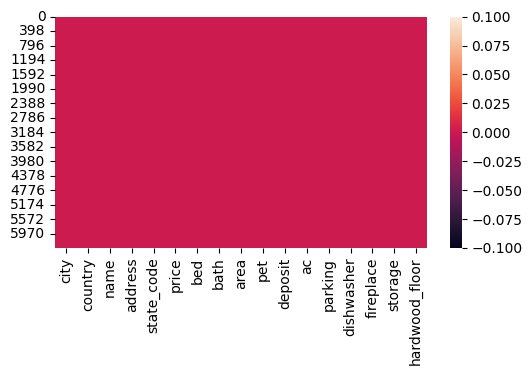

In [16]:
plt.figure(figsize = (6,3))
sns.heatmap(df.isnull())

 statistical analysis 

In [17]:
df.describe()

,price,bed,bath,area,deposit
count,6.354000e+03,6354.000000,6354.000000,6354.000000,6.354000e+03
mean,3.966240e+05,1.565313,1.313736,550.916745,1.333315e+05
std,4.530133e+05,1.110983,0.611116,1396.294463,1.578420e+05
min,1.911800e+04,0.000000,0.500000,0.000000,2.909000e+03
25%,1.571302e+05,1.000000,1.000000,0.000000,7.363294e+04
50%,2.838545e+05,1.000000,1.000000,269.000000,9.693047e+04
75%,4.903665e+05,2.000000,1.315658,800.000000,1.604847e+05
max,9.764356e+06,21.000000,10.000000,45400.000000,4.993203e+06


Count: This indicates that there are 6,103 non-null values in the 'price', 'bed', 'bath', 'area', and 'deposit' columns.

Mean: This represents the average value of each column. For instance, the mean price is approximately 1.275 million, the mean number of bedrooms is approximately 1.53, the mean number of bathrooms is approximately 1.31, the mean area is approximately 873 square units, and the mean deposit is approximately 121,108.

Standard Deviation (Std): This measures the dispersion or spread of values around the mean. A higher standard deviation indicates more variability in the data. For example, the standard deviation of prices is quite high at approximately 10.9 million, indicating significant variability in property prices.

Minimum (Min): This is the smallest value in each column. For instance, the minimum price is approximately 19,118, the minimum number of bedrooms is 0, the minimum number of bathrooms is 0.5, the minimum area is 55 square units, and the minimum deposit is 2,909.

25th Percentile (25%): This value represents the first quartile, indicating that 25% of the data falls below this value and 75% falls above it. For example, the 25th percentile price is approximately 163,314, the 25th percentile number of bedrooms is 1, the 25th percentile number of bathrooms is 1, the 25th percentile area is approximately 645.83 square units, and the 25th percentile deposit is approximately 121,108.

50th Percentile (50%)/Median: This value represents the median, which is the middle value in the dataset when it is ordered from smallest to largest. For instance, the median price is approximately 292,416, the median number of bedrooms is 1, the median number of bathrooms is 1, the median area is approximately 873.08 square units, and the median deposit is approximately 121,108.

75th Percentile (75%): This value represents the third quartile, indicating that 75% of the data falls below this value and 25% falls above it. For example, the 75th percentile price is approximately 511,197, the 75th percentile number of bedrooms is 2, the 75th percentile number of bathrooms is approximately 1.31, the 75th percentile area is approximately 873.08 square units, and the 75th percentile deposit is approximately 121,109.

Maximum (Max): This is the largest value in each column. For instance, the maximum price is approximately 344.85 million, the maximum number of bedrooms is 21, the maximum number of bathrooms is 8, the maximum area is 11,763 square units, and the maximum deposit is approximately 816,570.

# Graphical analysis

UNIVARIENT-ANALYSIS

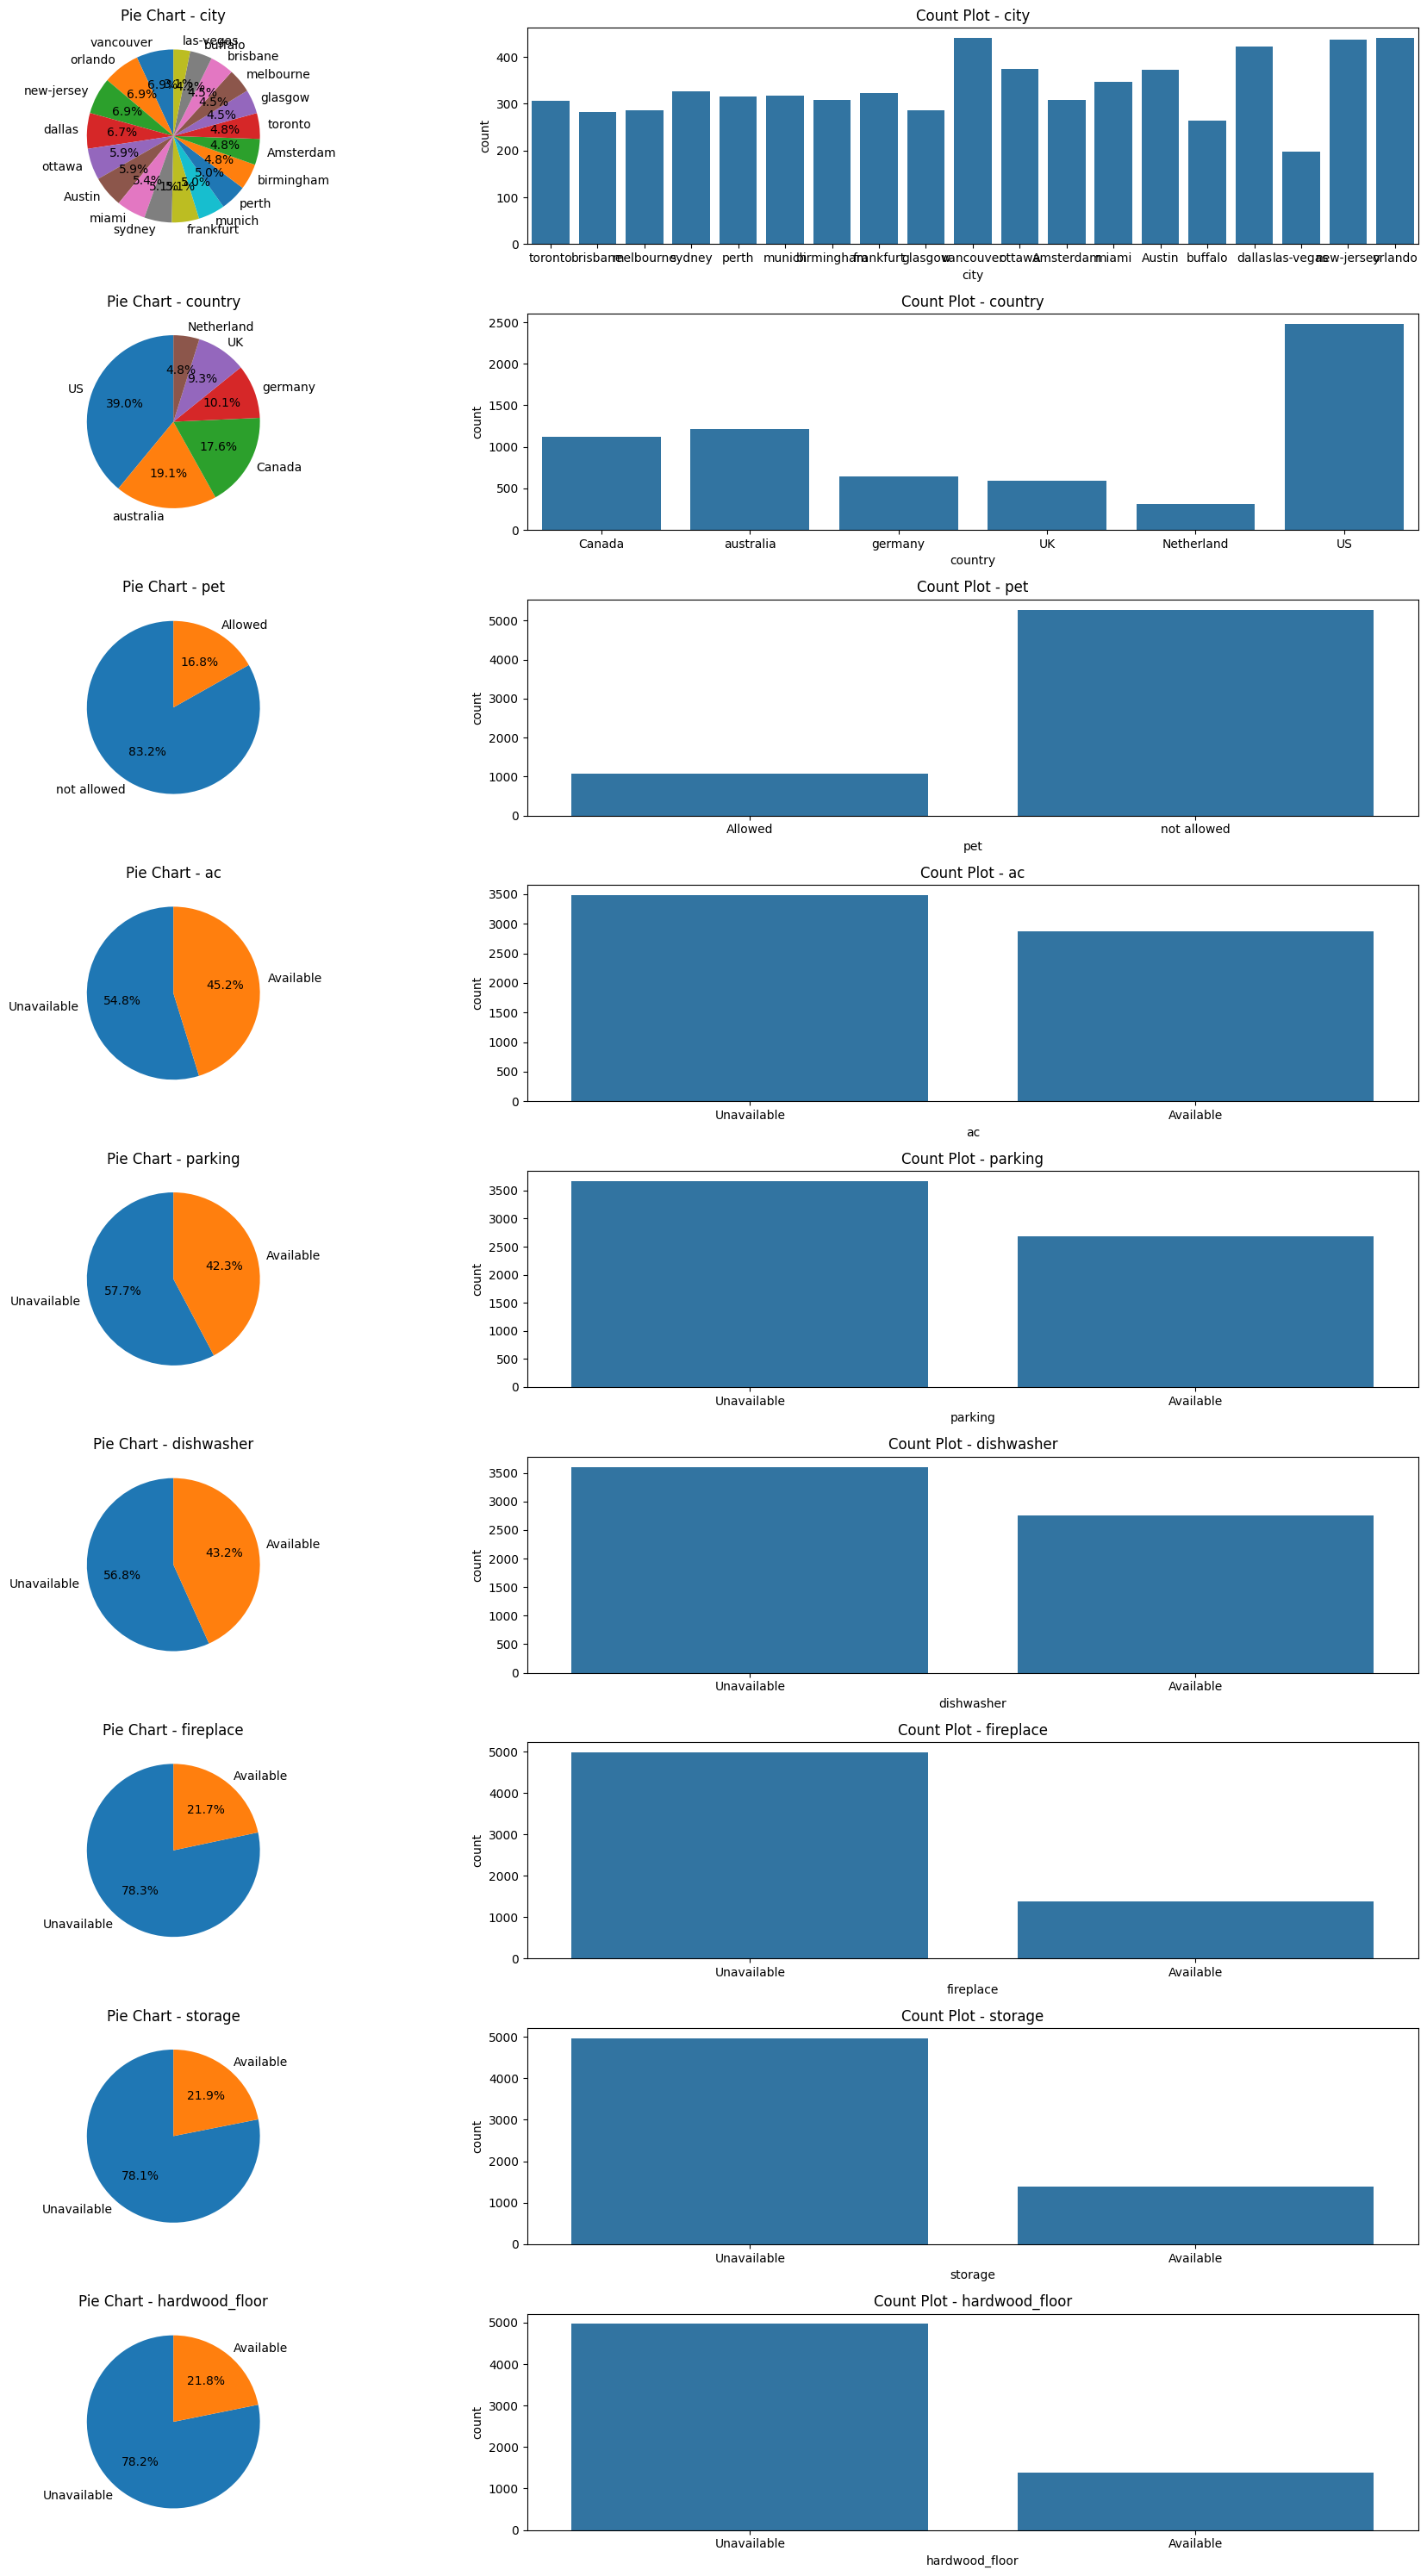

In [18]:

ccol = ['city','country','pet', 'ac','parking', 'dishwasher', 'fireplace', 'storage', 'hardwood_floor']
fig, axes = plt.subplots(len(ccol), 2, figsize=(20, 30))

for i, column in enumerate(ccol):
    # Pie Chart
    df[column].value_counts().plot(kind='pie', autopct='%.1f%%', ax=axes[i, 0], startangle=90)
    axes[i, 0].set_title(f'Pie Chart - {column}')
    axes[i, 0].set_ylabel('') 
    
    # Count Plot
    sns.countplot(x=column, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'Count Plot - {column}')
    axes[i, 1].set_xlabel(column) 

plt.tight_layout()
plt.show()

BI-VARIENT ANALYSIS

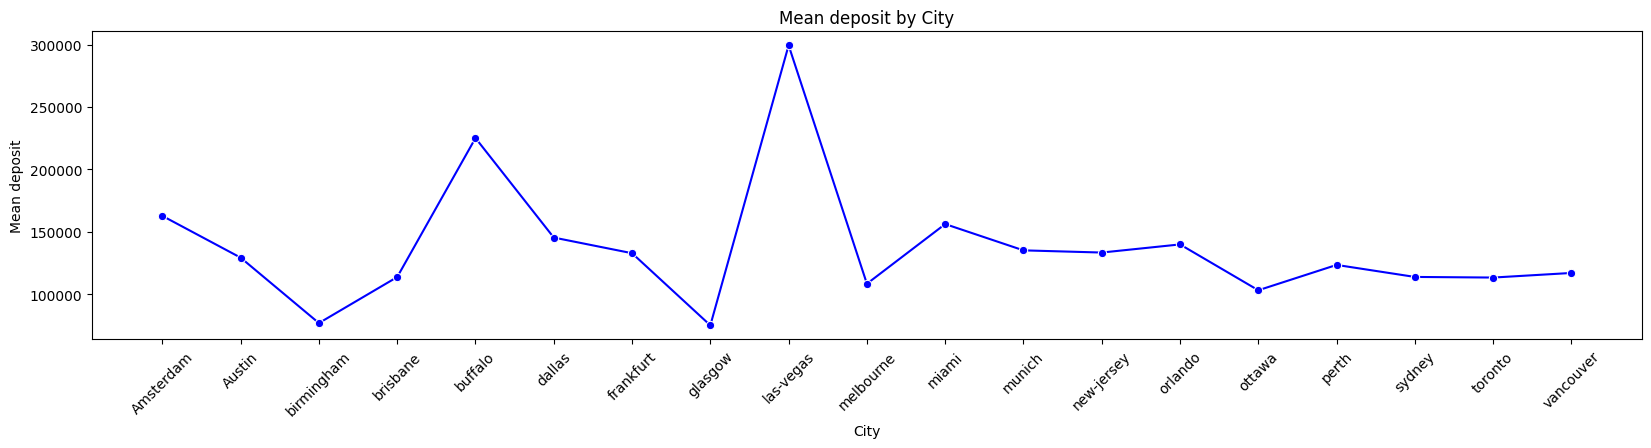

In [19]:
plt.figure(figsize=(20, 4))
sns.lineplot(x='city', y='deposit', data=df.groupby('city')['deposit'].mean().reset_index(), marker='o', color='blue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('City')
plt.ylabel('Mean deposit')
plt.title('Mean deposit by City')
plt.show()

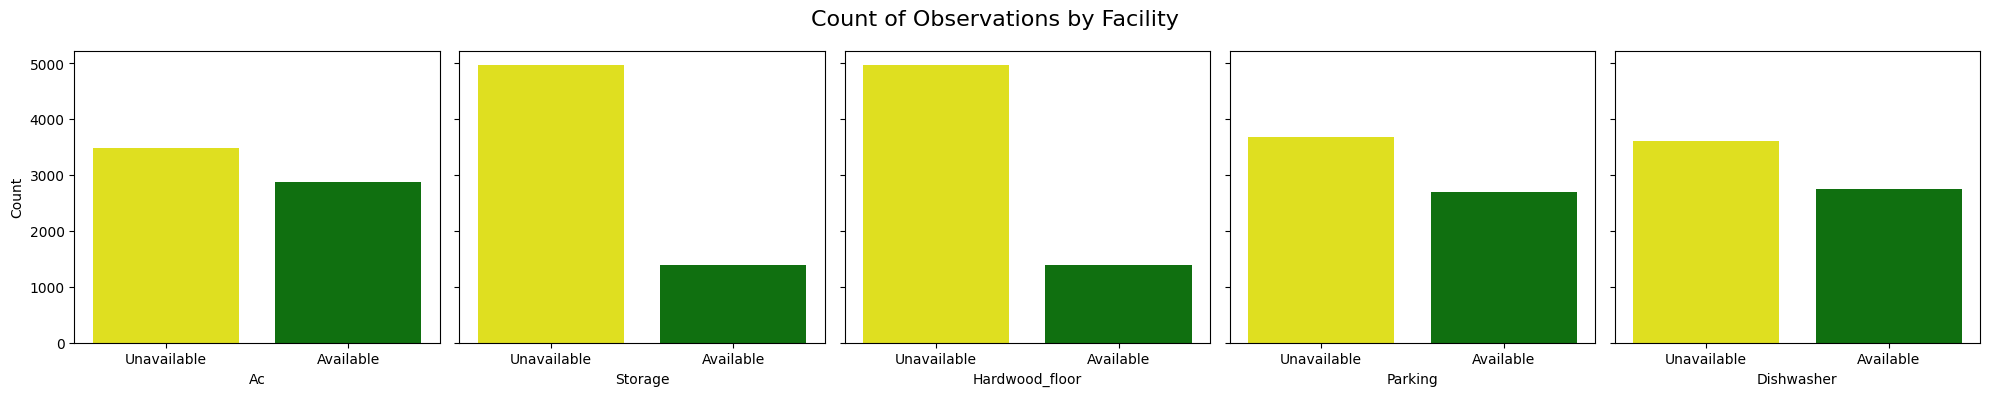

In [20]:
facilities = ['ac', 'storage', 'hardwood_floor', 'parking','dishwasher']

fig, axes = plt.subplots(nrows=1, ncols=len(facilities), figsize=(20, 4), sharey=True)

# Loop through each facility and plot count of observations
for i, facility in enumerate(facilities):
    sns.countplot(x=facility, data=df, ax=axes[i], palette=['Yellow', 'Green', 'Orange', 'Red'])
    axes[i].set_xlabel(facility.capitalize())  # Set xlabel
    axes[i].set_ylabel('Count')  # Set ylabel

plt.suptitle('Count of Observations by Facility', fontsize=16)
plt.tight_layout()
plt.show()


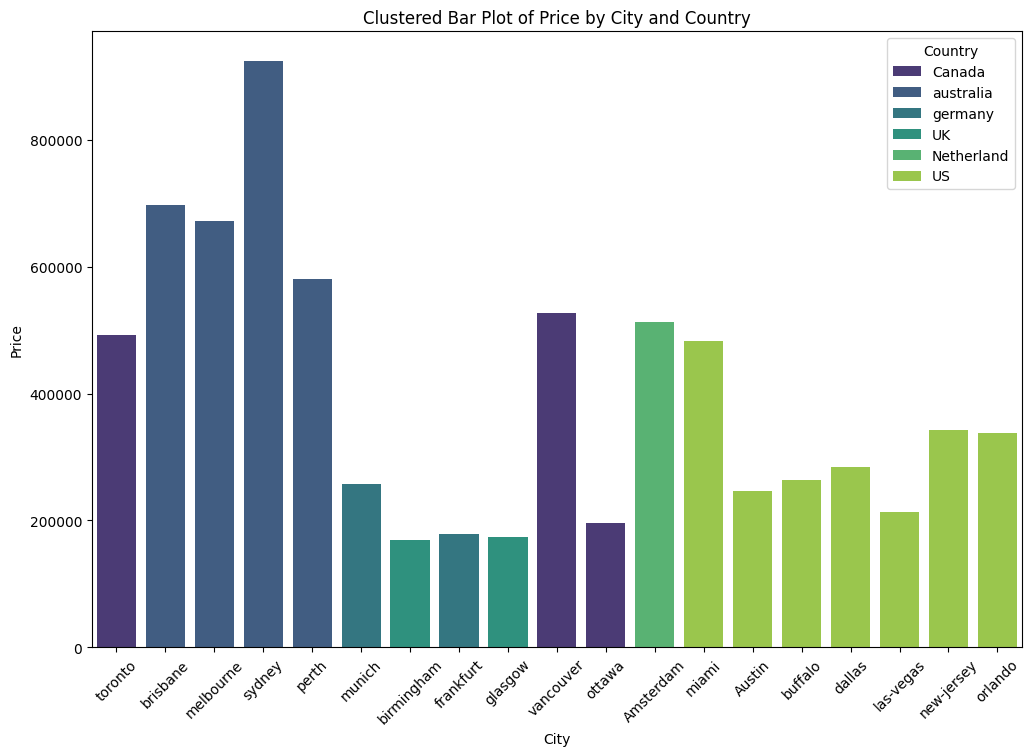

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(x='city', y='price', data=df, hue='country', ci=None, palette='viridis')
plt.title('Clustered Bar Plot of Price by City and Country')
plt.xlabel('City')
plt.ylabel('Price')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.show()

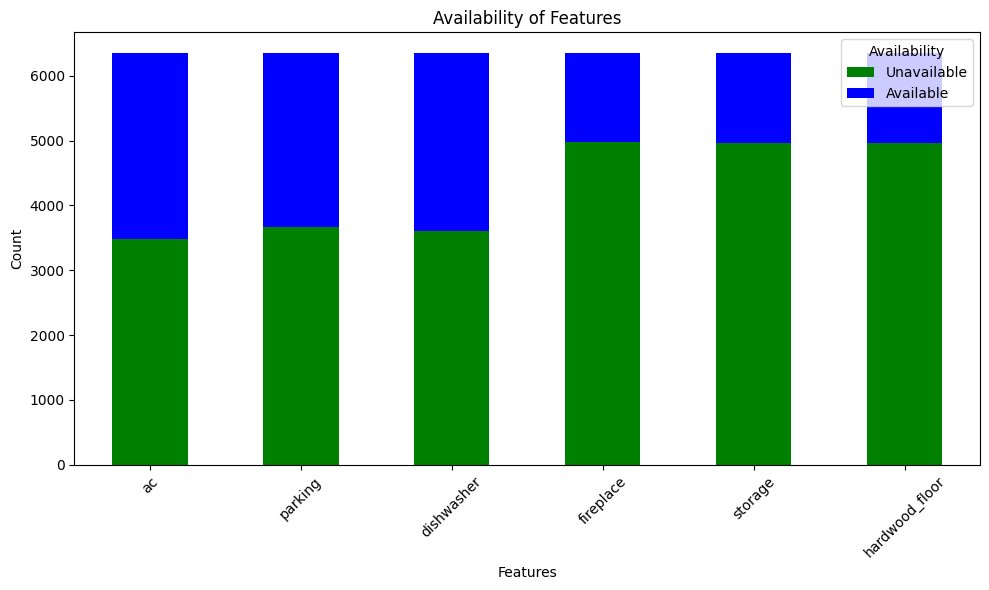

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

features = ['ac', 'parking', 'dishwasher', 'fireplace', 'storage', 'hardwood_floor']
colors = ['green', 'blue']  # Available, Unavailable

# Grouping by the 'feature' column and counting the occurrences of each value
availability_counts = df[features].apply(pd.Series.value_counts).fillna(0)

# Plotting the bar chart
availability_counts.transpose().plot(kind='bar', stacked=True, ax=ax, color=colors)

ax.set_title('Availability of Features')
ax.set_xlabel('Features')
ax.set_ylabel('Count')
ax.legend(title='Availability', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

LabelEncode for categorical data

In [23]:
LE = LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i] = LE.fit_transform(df[i])
df.head()

,city,country,name,address,state_code,price,bed,bath,area,pet,deposit,ac,parking,dishwasher,fireplace,storage,hardwood_floor
0,17,0,2615,453,105,99744,1,2.0,0.0,0,99600.0,1,1,1,1,1,1
1,17,0,1909,2934,105,211956,0,1.0,441.0,1,99600.0,1,1,1,1,1,1
2,17,0,4449,3153,105,224424,1,1.0,614.0,1,99600.0,1,1,1,1,1,1
3,17,0,3496,3153,105,224424,1,1.0,581.0,1,99600.0,1,1,1,1,1,1
4,17,0,4480,3153,105,245204,2,1.0,646.0,1,99600.0,1,1,1,1,1,1


In [24]:
ncol

Index(['price', 'bed', 'bath', 'area', 'deposit'], dtype='object')

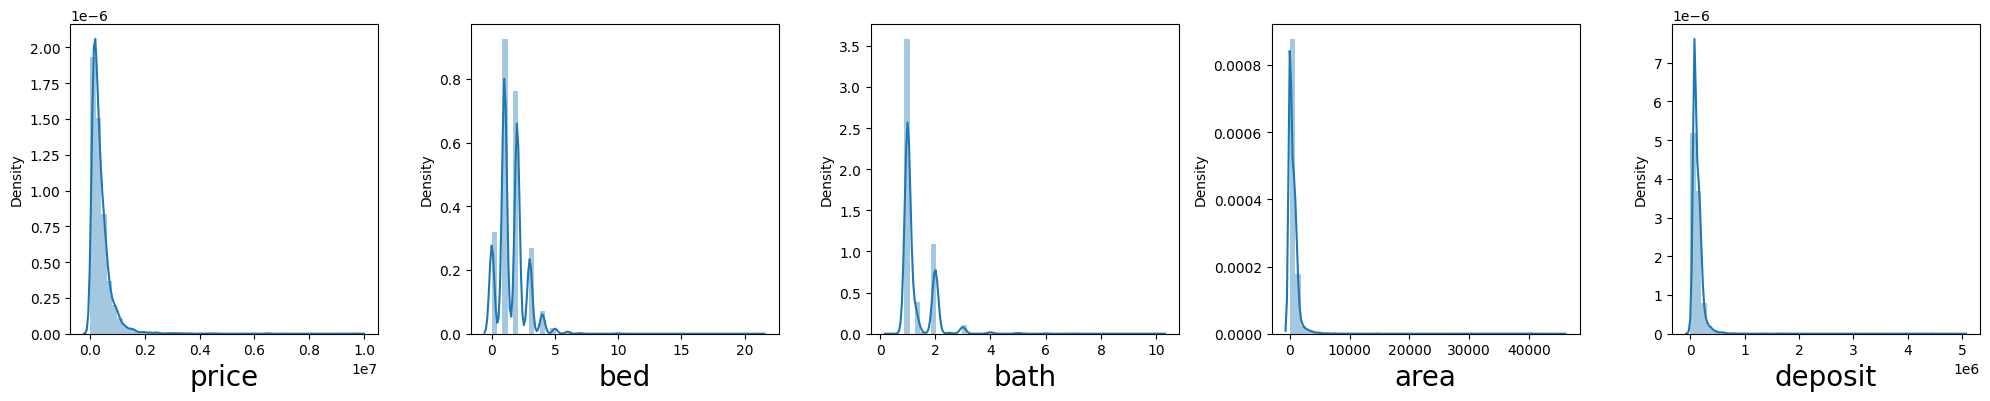

In [25]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in ncol:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(df[column]) 
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

most of the numerical data are right skewed!!

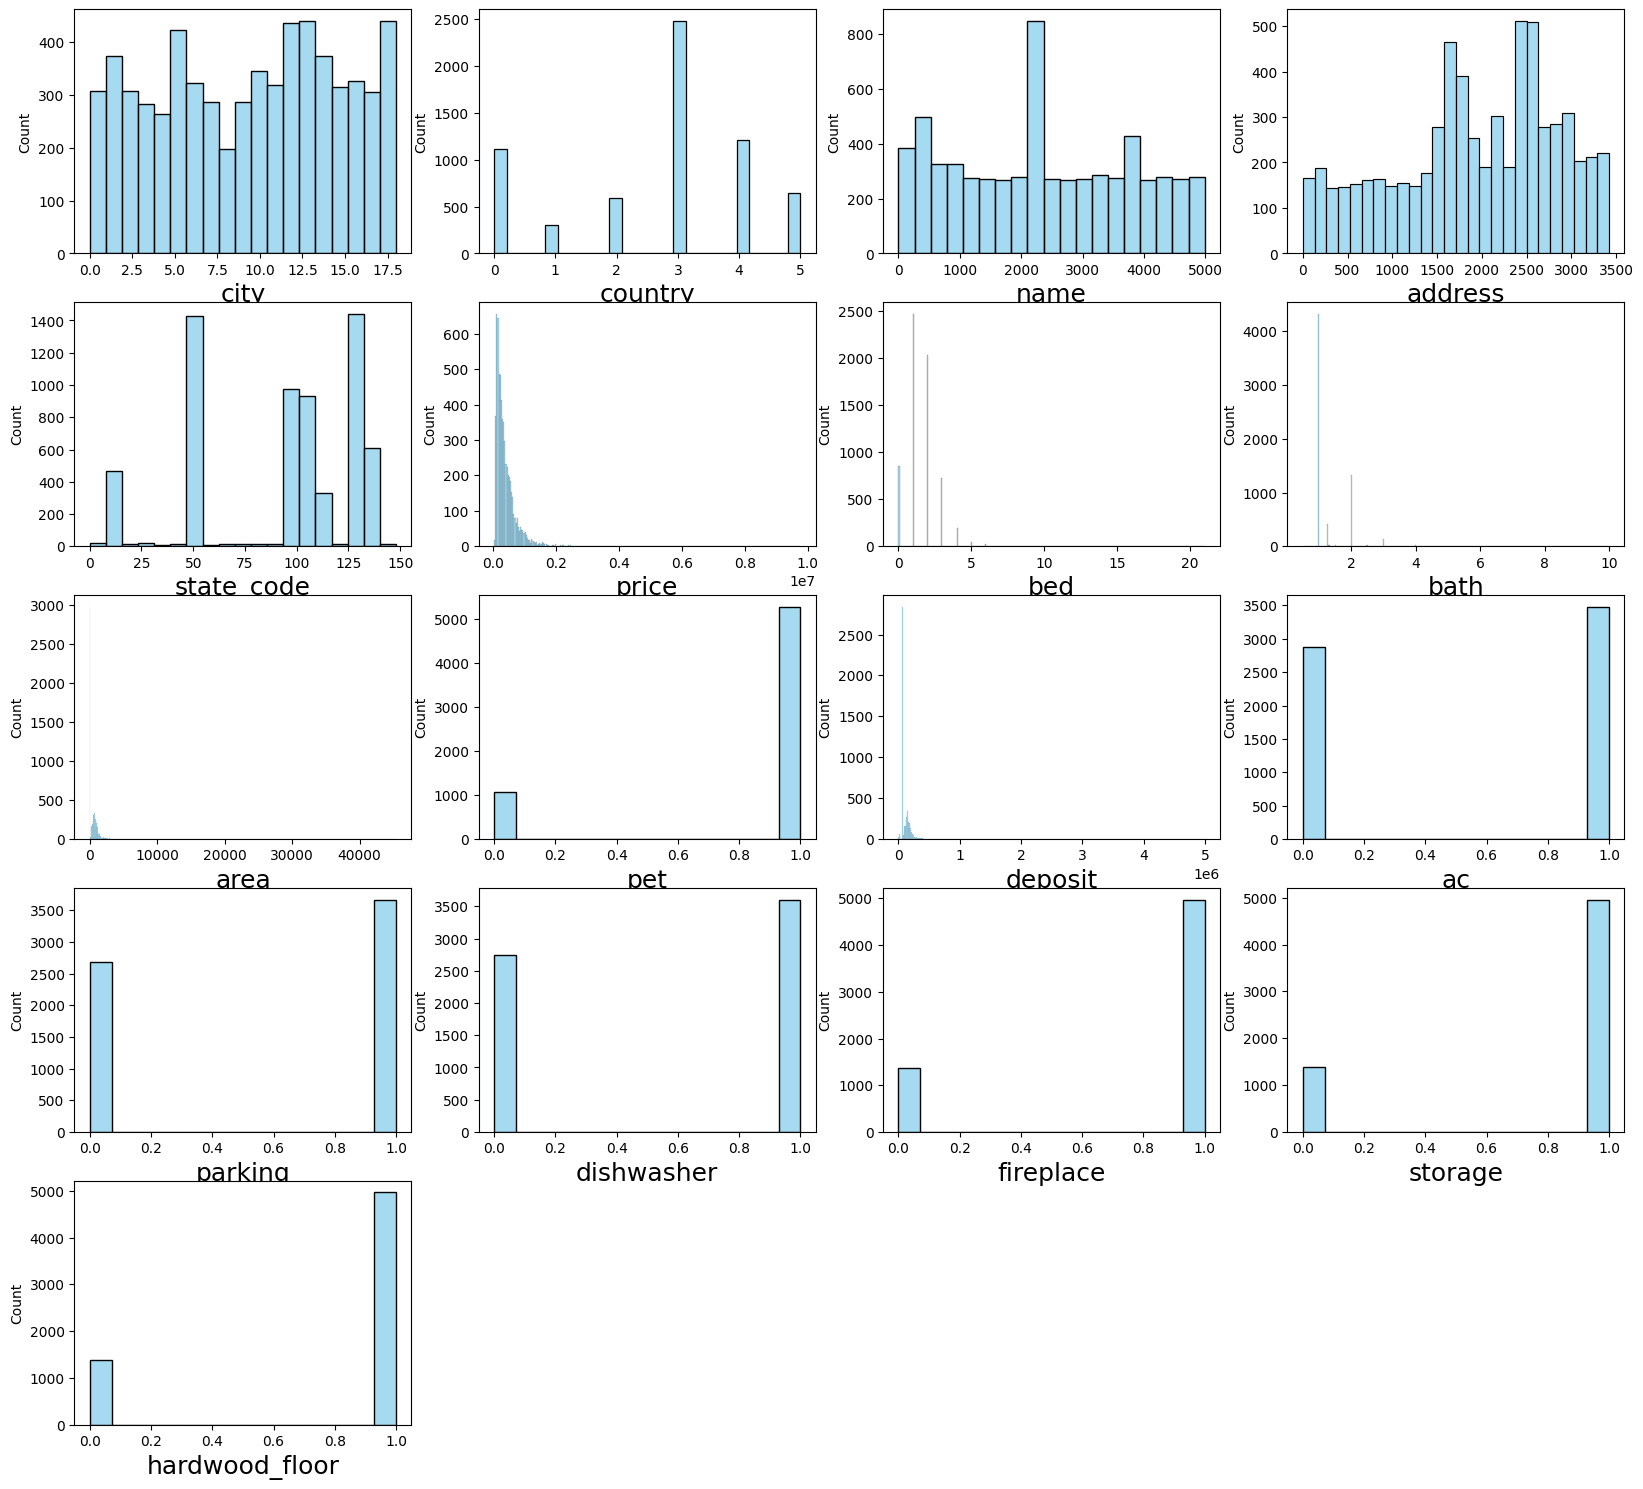

In [26]:
plt.figure(figsize = (20,45))
plotnumber = 1

for column in df:
    if plotnumber <=18:
        ax = plt.subplot(12,4,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=18)
        
    plotnumber += 1
plt.show()

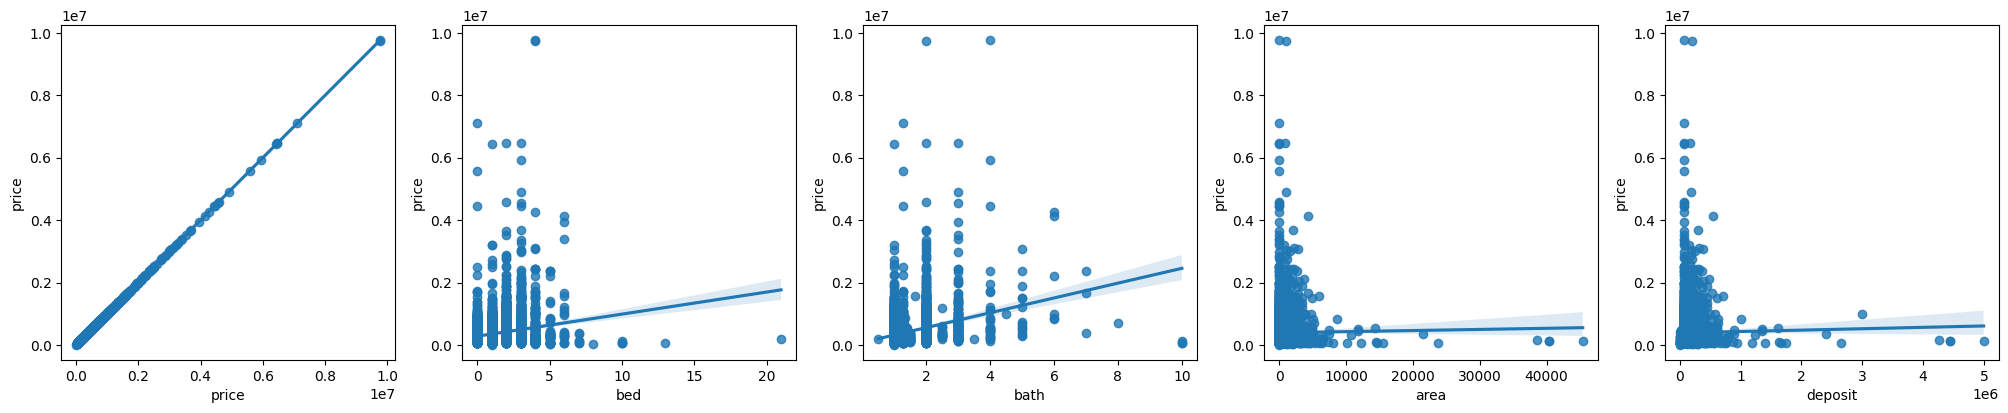

In [27]:
plt.figure(figsize=(25, 20))
plotnumber = 1

for column in ncol:  # Iterate directly over ncol
    if plotnumber <= 20:
        plt.subplot(4, 5, plotnumber) 
        sns.regplot(x=df[column], y=df['price'])
        plt.xlabel(column)
        plt.ylabel('price')
        plotnumber += 1
plt.show()


analysing the outliers 

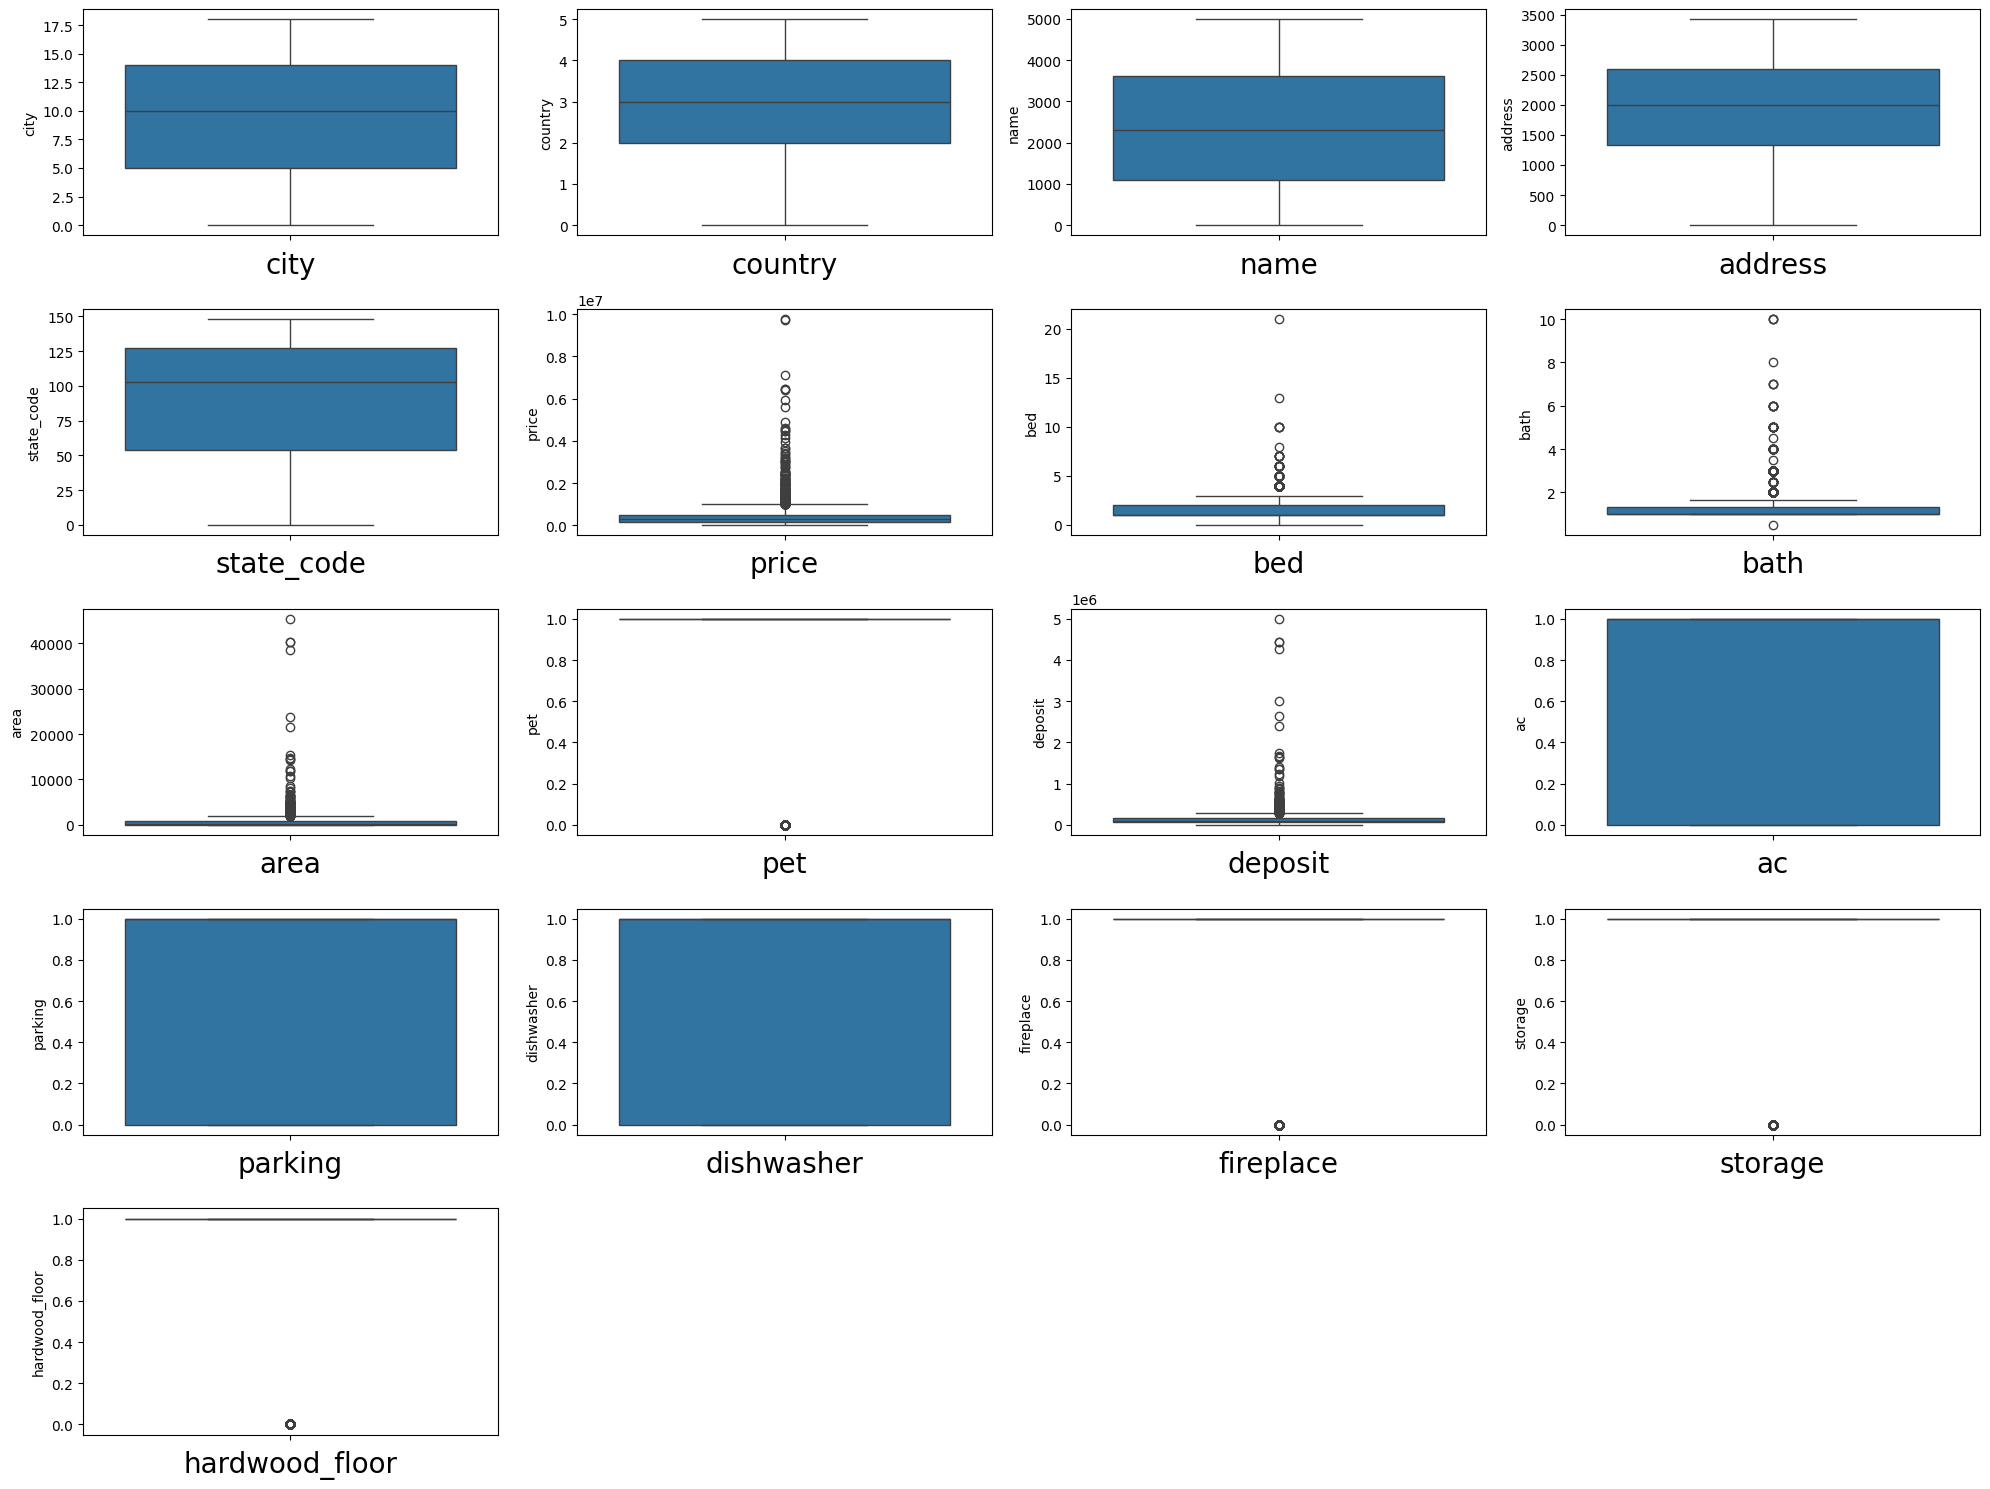

In [28]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=18:
        plt.subplot(5,4,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

removing outliers

In [29]:
df.shape

(6354, 17)

In [30]:
# METHOD 1
from scipy.stats import zscore
z = np.abs(zscore(df[['price', 'bed', 'bath', 'deposit', 'area']]))
threshold = 3
df1= df[(z < threshold).all(axis=1)]

In [31]:
df1.shape

(6131, 17)

In [32]:
print("data loss ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss  3.5096002518098834


In [33]:
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1
df2=df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [34]:
df2.shape

(2846, 17)

In [35]:
print("data loss ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

data loss  55.2093169656909


In [36]:
df=df1

MULTI-VARRIENT ANALYSIS

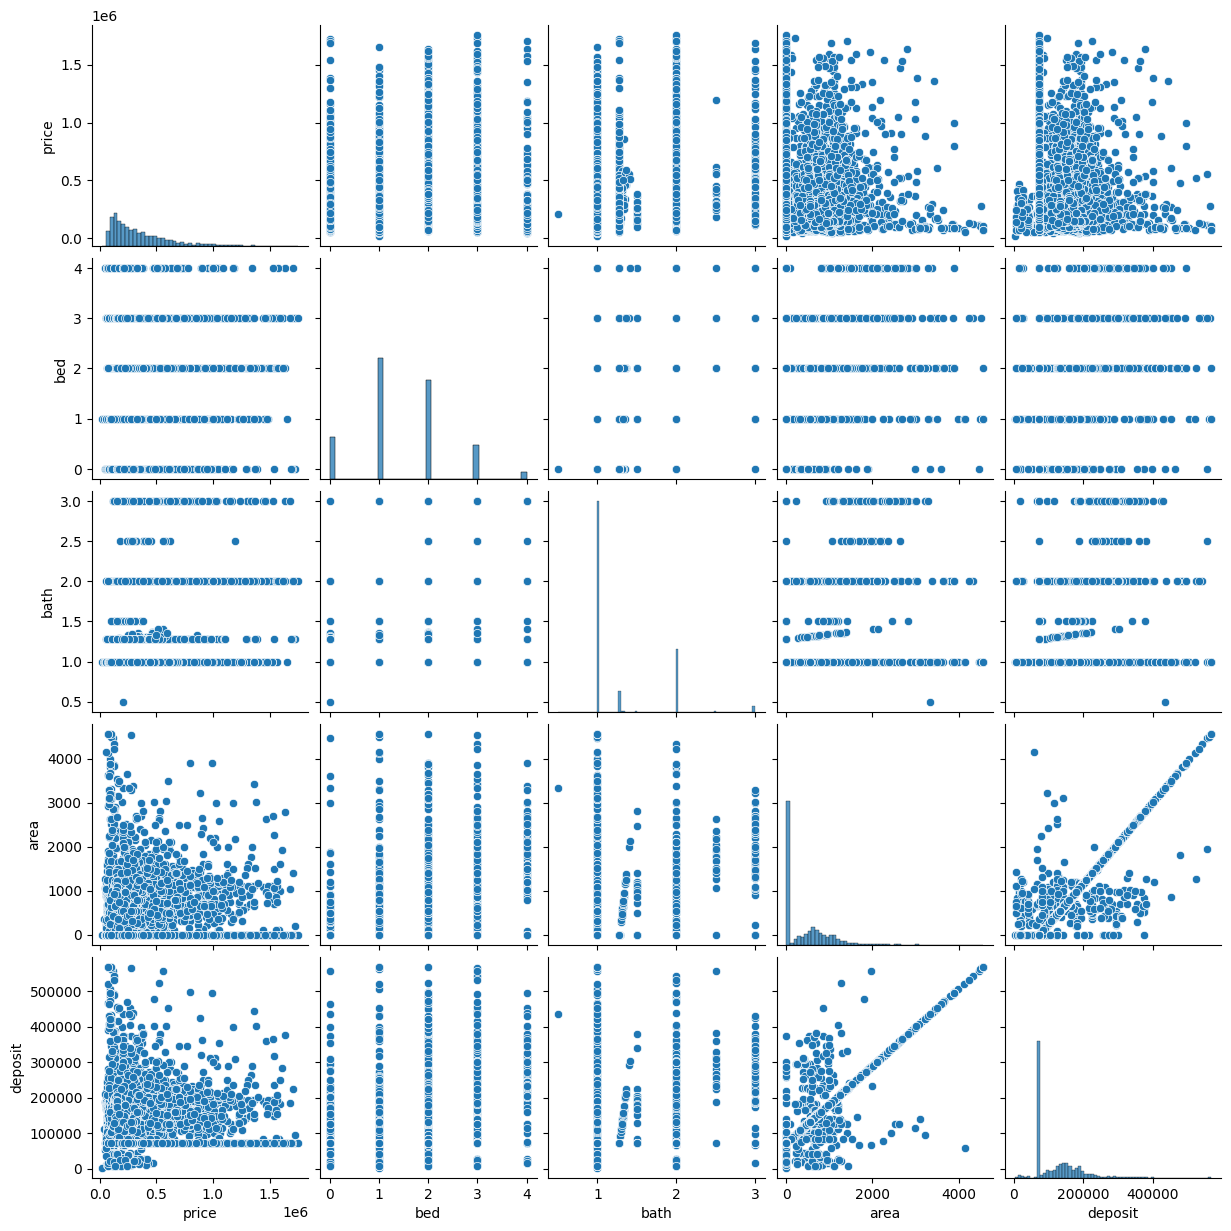

In [37]:
sns.pairplot(df[ncol])
plt.show()

Heatmap for checking correlation

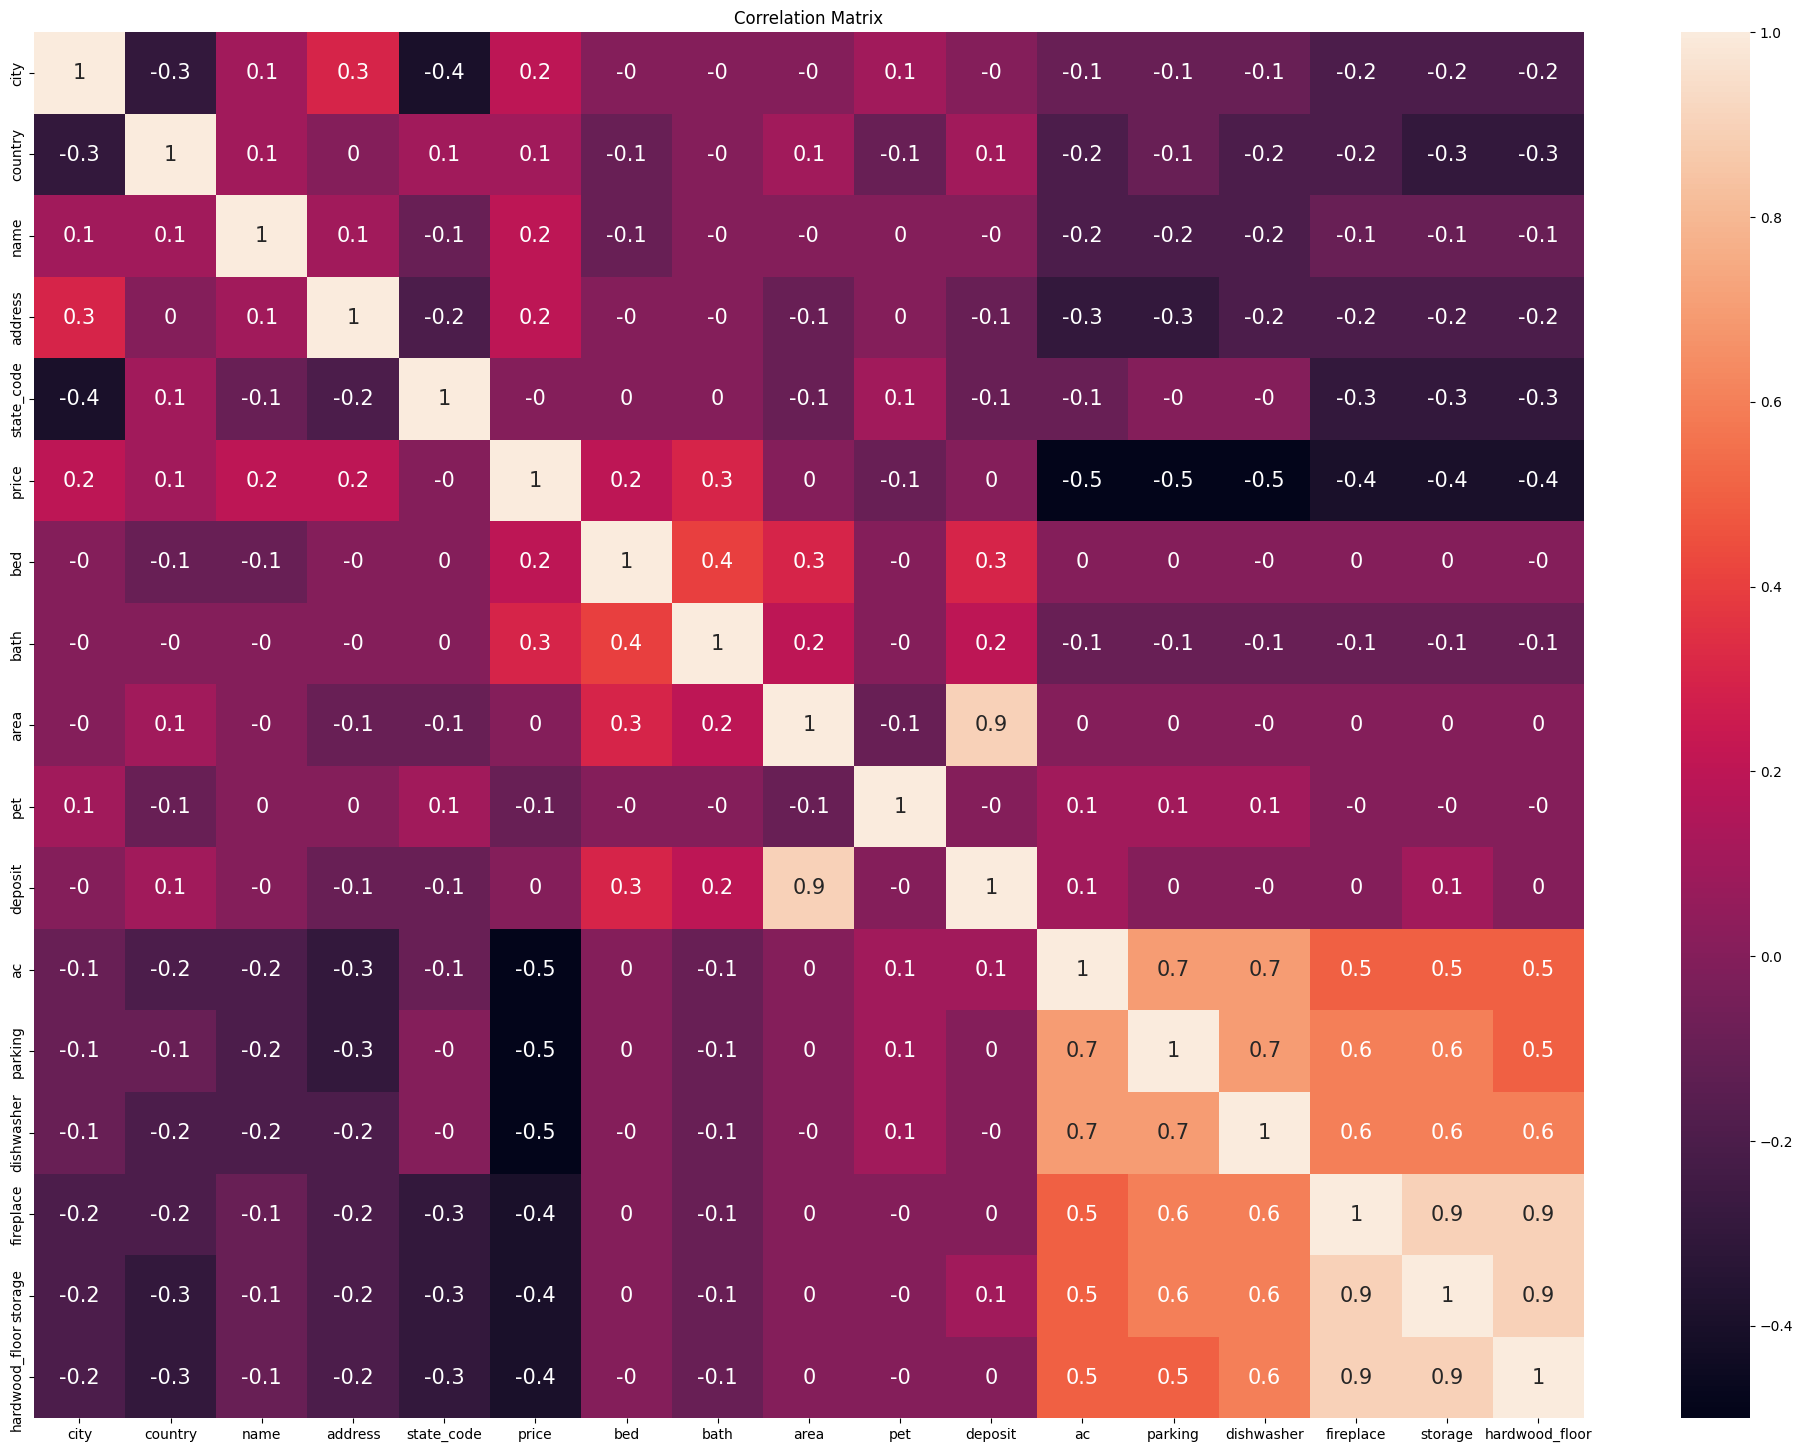

In [38]:
plt.figure(figsize=[25, 18])
sns.heatmap(df.corr().round(1), annot=True, annot_kws={'size': 15}) 
plt.title('Correlation Matrix')
plt.show()

correlation between each feature and the target variable

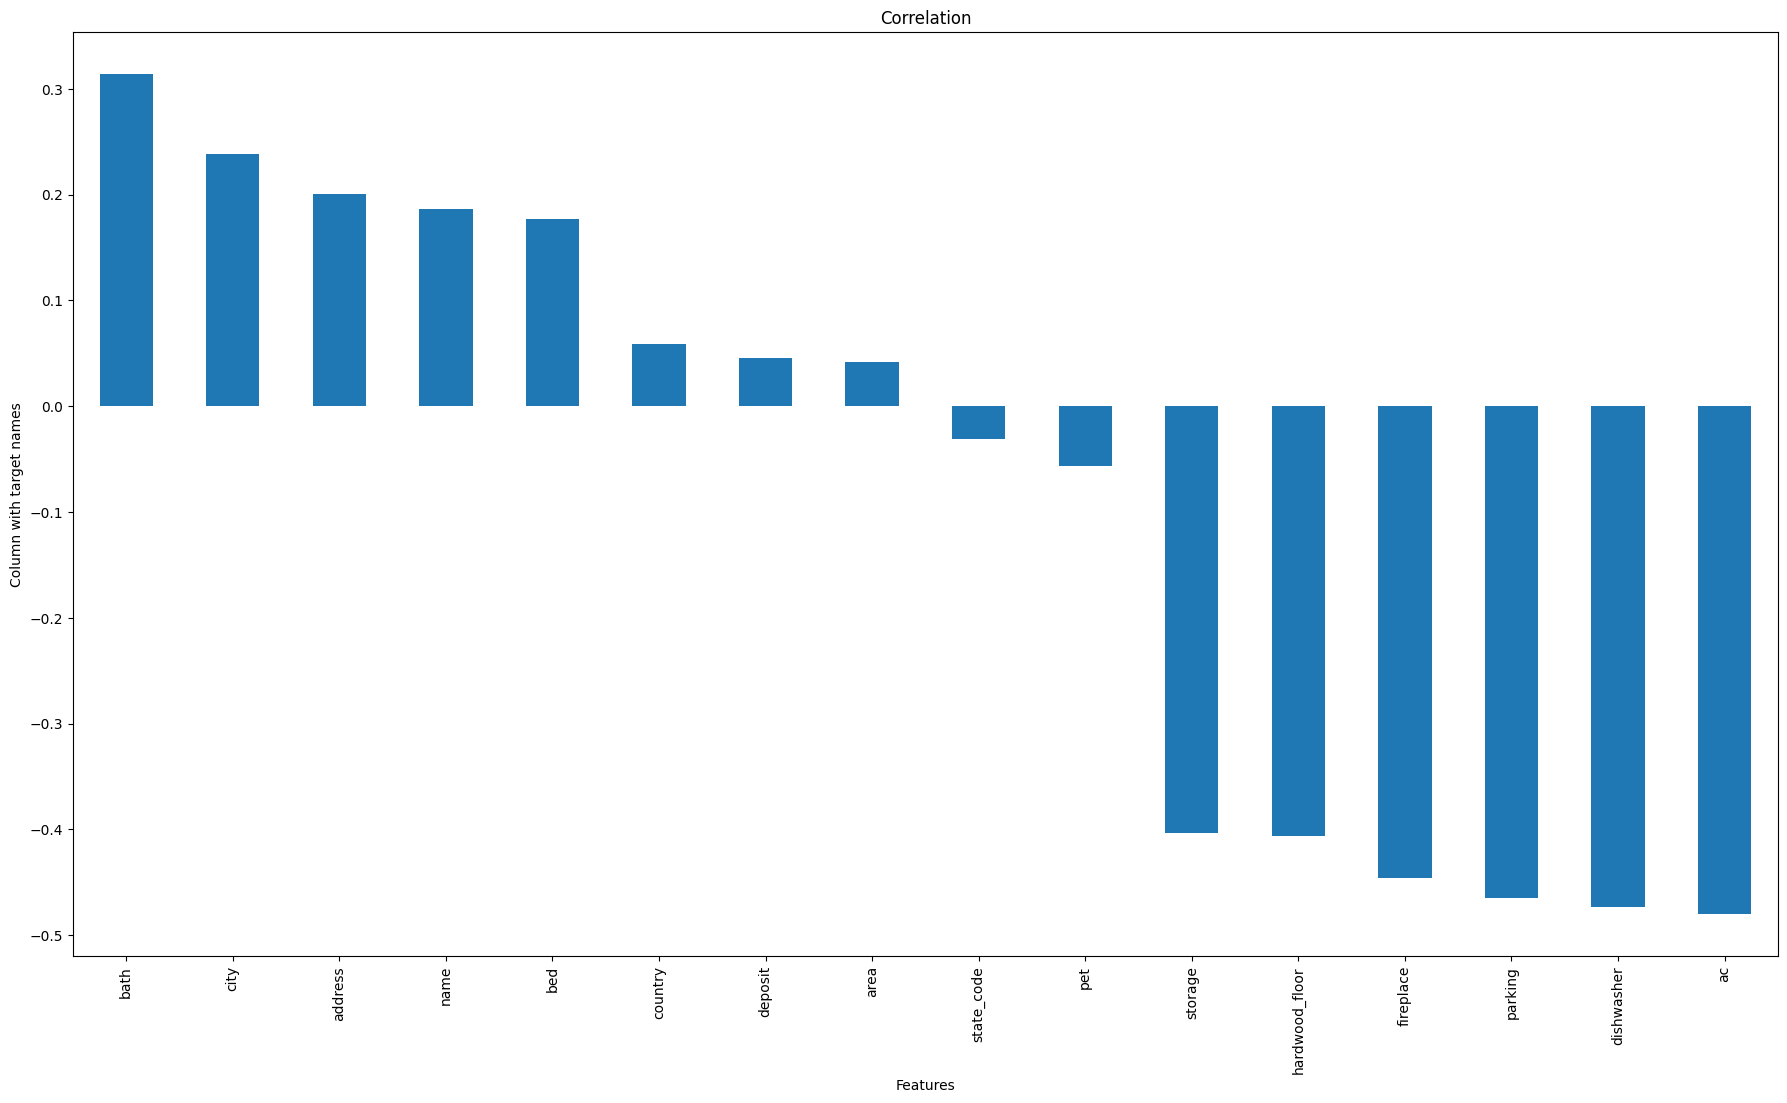

In [39]:
plt.figure(figsize =(22, 12))
df.corr()['price'].sort_values(ascending = False).drop(['price']).plot(kind ='bar')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

city
-0.09708678874870108


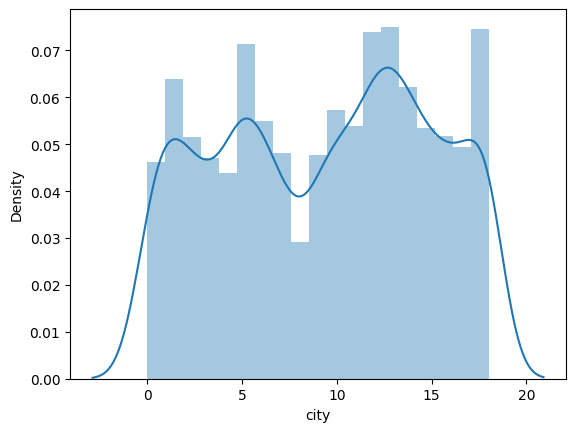

country
-0.532613771475508


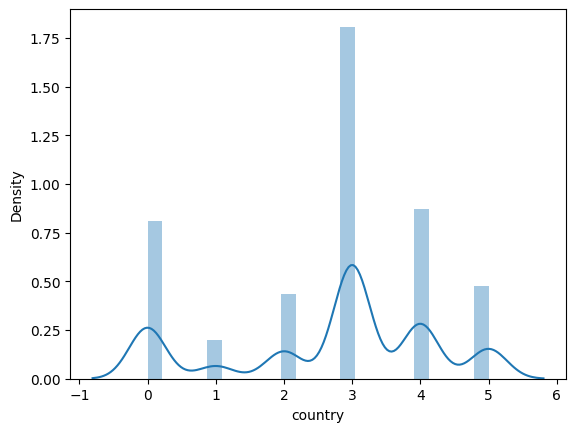

name
0.07285614023647792


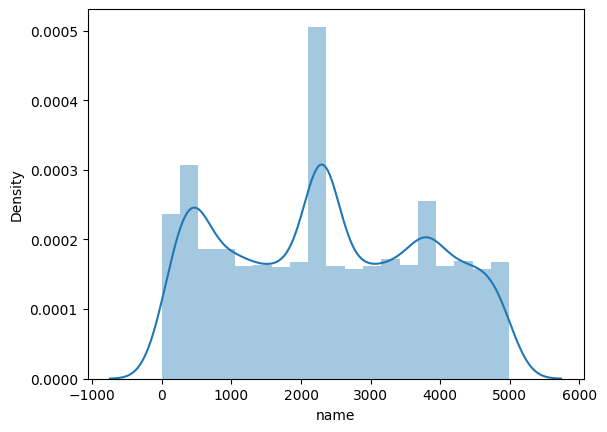

address
-0.38289576325488417


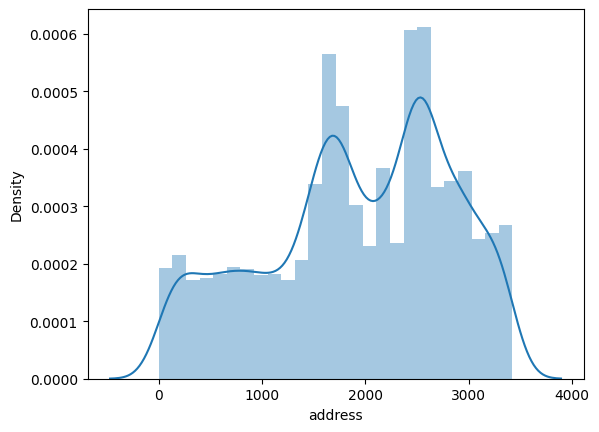

state_code
-0.6880967094476124


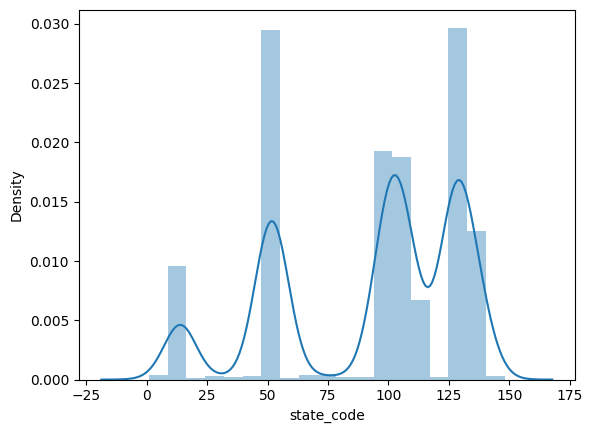

price
1.690428286693761


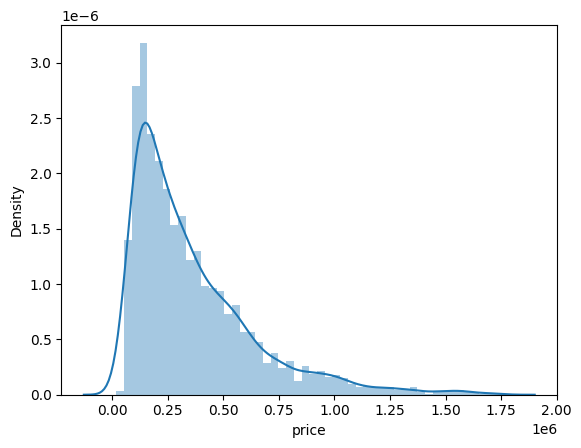

bed
0.38339922049844055


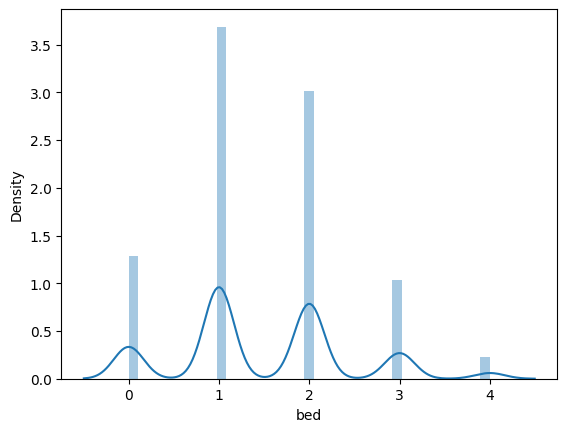

bath
1.6158843751104912


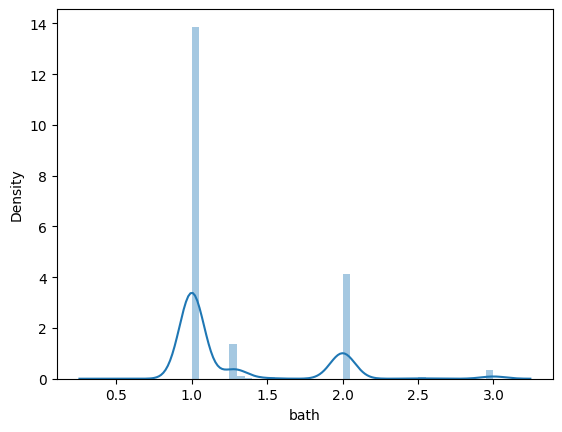

area
2.0564649561492483


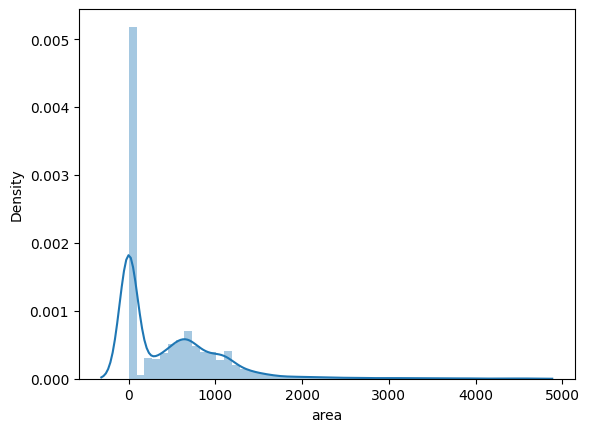

pet
-1.7589906090705412


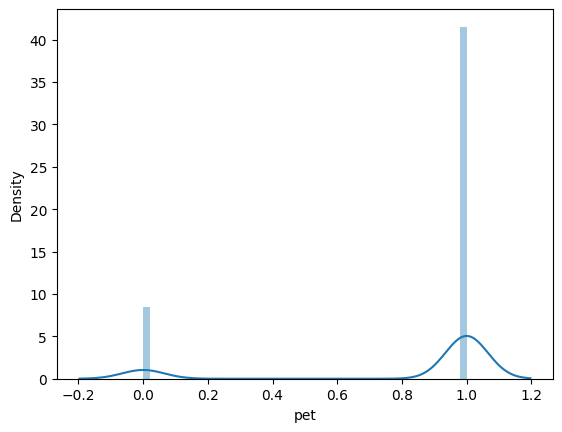

deposit
1.9138349897799805


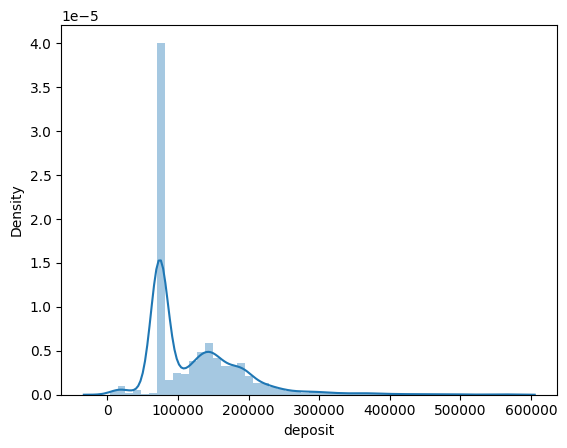

ac
-0.18906291261425062


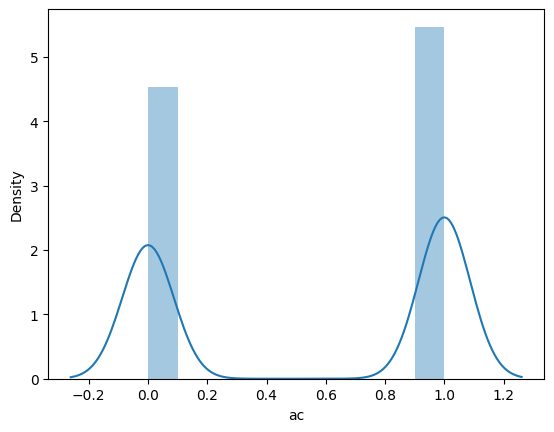

parking
-0.3092931797808002


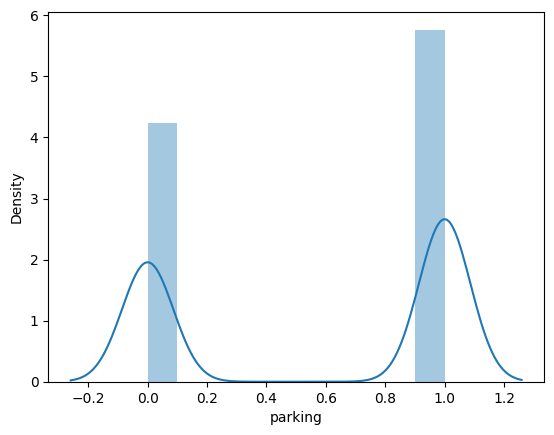

dishwasher
-0.2749481158202206


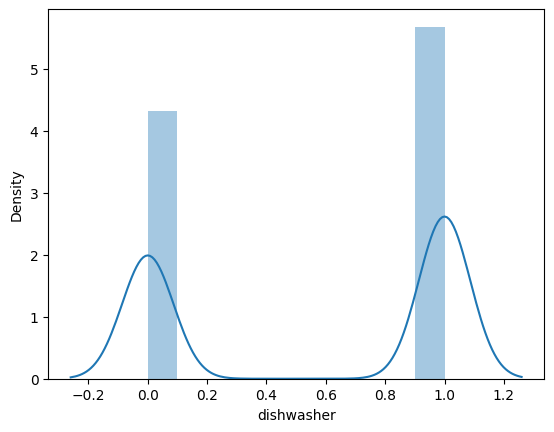

fireplace
-1.3947307795352732


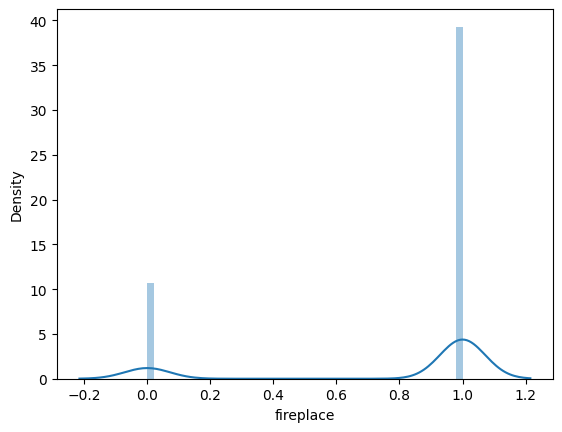

storage
-1.3689567185270801


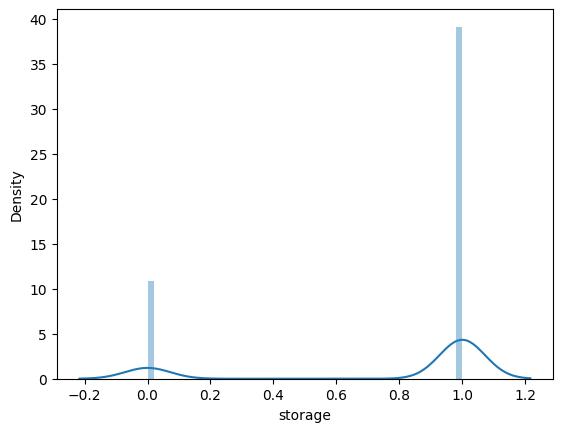

hardwood_floor
-1.3736084069897057


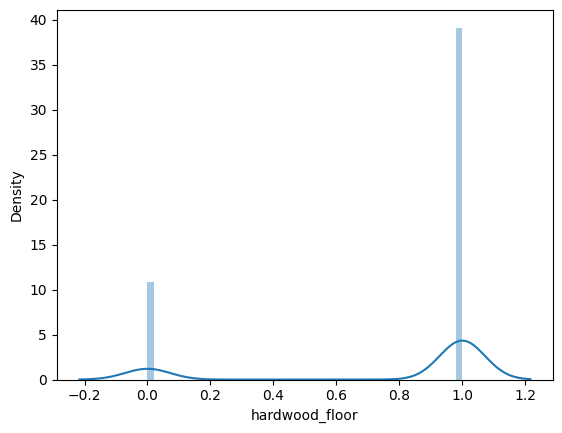

In [40]:
for i in df:
    print(i)
    print(skew(df[i]))
    plt.figure
    sns.distplot(df[i])
    plt.show()

In [41]:
df.skew()

city             -0.097111
country          -0.532744
name              0.072874
address          -0.382989
state_code       -0.688265
price             1.690842
bed               0.383493
bath              1.616280
area              2.056968
pet              -1.759421
deposit           1.914303
ac               -0.189109
parking          -0.309369
dishwasher       -0.275015
fireplace        -1.395072
storage          -1.369292
hardwood_floor   -1.373945
dtype: float64

Skewness values closer to 0 indicate less skew, while positive skewness indicates a right-skewed distribution (tail on the right) and negative skewness indicates a left-skewed distribution (tail on the left).

In [42]:
skewed_features = ['price', 'bed', 'bath', 'area', 'deposit']
for feature in skewed_features:
    if df[feature].skew() > 0.5:  
        df[feature] = np.log1p(df[feature]) 


DATA PREPARATION for ML- price 

In [43]:
x = df1.drop(['price'], axis=1)
y = df1['price']

feature scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,city,country,name,address,state_code,bed,bath,area,pet,deposit,ac,parking,dishwasher,fireplace,storage,hardwood_floor
0,1.382104,-1.74819,0.169676,-1.634983,0.331066,-0.511788,1.633334,-1.051839,-2.211228,-0.13655,0.909927,0.857241,0.871931,0.521781,0.527343,0.526332
1,1.382104,-1.74819,-0.327680,1.126371,0.331066,-1.566500,-0.595118,0.784327,0.452237,-0.13655,0.909927,0.857241,0.871931,0.521781,0.527343,0.526332
2,1.382104,-1.74819,1.461675,1.370118,0.331066,-0.511788,-0.595118,0.883896,0.452237,-0.13655,0.909927,0.857241,0.871931,0.521781,0.527343,0.526332
3,1.382104,-1.74819,0.790314,1.370118,0.331066,-0.511788,-0.595118,0.867271,0.452237,-0.13655,0.909927,0.857241,0.871931,0.521781,0.527343,0.526332
4,1.382104,-1.74819,1.483514,1.370118,0.331066,0.542925,-0.595118,0.899187,0.452237,-0.13655,0.909927,0.857241,0.871931,0.521781,0.527343,0.526332


In [45]:
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (x, i) for i in range (x.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.668059,city
1,1.343803,country
2,1.110304,name
3,1.290359,address
4,1.657317,state_code
5,1.307755,bed
6,1.263592,bath
7,2.578323,area
8,1.078642,pet
9,2.581419,deposit


# Machine Learning- price

In [46]:
print(x.shape, y.shape)

(6131, 16) (6131,)


training and testing the data 

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

Model buidling

In [70]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i  )
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print(" max r2 score : ",maxacc," on random state ", maxrs)

 max r2 score :  0.5315713515416578  on random state  105


In [48]:
model={'dt':DecisionTreeRegressor(),'rf':RandomForestRegressor(),'lR': LinearRegression(),
       'svr': SVR(),'knn':KNeighborsRegressor(),'rid':Ridge(),'ls':Lasso(),'gb':GradientBoostingRegressor(),'et':ExtraTreesRegressor(),}     
print(model)

{'dt': DecisionTreeRegressor(), 'rf': RandomForestRegressor(), 'lR': LinearRegression(), 'svr': SVR(), 'knn': KNeighborsRegressor(), 'rid': Ridge(), 'ls': Lasso(), 'gb': GradientBoostingRegressor(), 'et': ExtraTreesRegressor()}


In [49]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([11.43544685, 11.65372848, 12.30212799, ..., 12.8434777 ,
       12.1576596 , 13.88261335])

In [50]:
value.score(x_train,y_train)

0.9996811307328937

In [51]:
value.score(x_test,y_test)

0.6865805630280242

In [52]:
mae = {}
mse = {}
r2 = {}
rmse = {}

for key, value in model.items():
    y_pred = value.predict(x_test)
    
    mae[key] = mean_absolute_error(y_test, y_pred)
    mse[key] = mean_squared_error(y_test, y_pred)
    r2[key] = r2_score(y_test, y_pred)
    rmse[key] = np.sqrt(mse[key])

details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
})

print("\nDetails for each model:")
print(details)
best_model =min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)


Details for each model:
          MAE       MSE      RMSE        R2
dt   0.357330  0.256232  0.506194  0.525589
rf   0.279227  0.148934  0.385919  0.724251
lR   0.412264  0.281117  0.530205  0.479515
svr  0.305922  0.174017  0.417154  0.677809
knn  0.315574  0.183189  0.428005  0.660829
rid  0.412273  0.281124  0.530212  0.479501
ls   0.611930  0.540311  0.735059 -0.000380
gb   0.306912  0.163599  0.404474  0.697097
et   0.292426  0.169280  0.411436  0.686581

Best Model based on RMSE: rf


Hyperparameter tunning

In [ ]:
best_rf_model = grid_search.best_estimator_



In [53]:
final_model = RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_split=2)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [54]:
grid_search = GridSearchCV(estimator=final_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=20, n_estimators=500),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [55]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [56]:
best_rf_model = grid_search.best_estimator_

In [58]:
# Evaluate the best model
y_pred = best_rf_model.predict(x_test) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE for the best model:", rmse)

RMSE for the best model: 0.38084681257035635


DATA PREPARATION for ML- area

In [59]:
x = df1.drop(['area'], axis=1)
y = df1['area']

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,city,country,name,address,state_code,price,bed,bath,pet,deposit,ac,parking,dishwasher,fireplace,storage,hardwood_floor
0,1.382104,-1.74819,0.169676,-1.634983,0.331066,-1.403406,-0.511788,1.633334,-2.211228,-0.13655,0.909927,0.857241,0.871931,0.521781,0.527343,0.526332
1,1.382104,-1.74819,-0.327680,1.126371,0.331066,-0.369654,-1.566500,-0.595118,0.452237,-0.13655,0.909927,0.857241,0.871931,0.521781,0.527343,0.526332
2,1.382104,-1.74819,1.461675,1.370118,0.331066,-0.291265,-0.511788,-0.595118,0.452237,-0.13655,0.909927,0.857241,0.871931,0.521781,0.527343,0.526332
3,1.382104,-1.74819,0.790314,1.370118,0.331066,-0.291265,-0.511788,-0.595118,0.452237,-0.13655,0.909927,0.857241,0.871931,0.521781,0.527343,0.526332
4,1.382104,-1.74819,1.483514,1.370118,0.331066,-0.169819,0.542925,-0.595118,0.452237,-0.13655,0.909927,0.857241,0.871931,0.521781,0.527343,0.526332


In [61]:
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (x, i) for i in range (x.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.737616,city
1,1.331565,country
2,1.117723,name
3,1.289989,address
4,1.638021,state_code
5,1.961198,price
6,1.316621,bed
7,1.330288,bath
8,1.074066,pet
9,1.144375,deposit


# Machine Learning- area

In [62]:
print(x.shape, y.shape)

(6131, 16) (6131,)


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [64]:
model={'dt':DecisionTreeRegressor(),'rf':RandomForestRegressor(),'lR': LinearRegression(),
       'svr': SVR(),'knn':KNeighborsRegressor(),'rid':Ridge(),'ls':Lasso(),'gb':GradientBoostingRegressor(),'et':ExtraTreesRegressor(),}     
print(model)

{'dt': DecisionTreeRegressor(), 'rf': RandomForestRegressor(), 'lR': LinearRegression(), 'svr': SVR(), 'knn': KNeighborsRegressor(), 'rid': Ridge(), 'ls': Lasso(), 'gb': GradientBoostingRegressor(), 'et': ExtraTreesRegressor()}


In [65]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([6.81387528, 0.        , 2.63773889, ..., 6.95986414, 6.60770864,
       7.47203076])

In [66]:
value.score(x_train,y_train)

1.0

In [67]:
value.score(x_test,y_test)

0.9701054108750887

In [68]:
mae = {}
mse = {}
r2 = {}
rmse = {}

for key, value in model.items():
    y_pred = value.predict(x_test)
    
    mae[key] = mean_absolute_error(y_test, y_pred)
    mse[key] = mean_squared_error(y_test, y_pred)
    r2[key] = r2_score(y_test, y_pred)
    rmse[key] = np.sqrt(mse[key])

details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
})

print("\nDetails for each model:")
print(details)
best_model =min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)


Details for each model:
          MAE       MSE      RMSE        R2
dt   0.088547  0.374327  0.611822  0.965892
rf   0.104210  0.285178  0.534021  0.974015
lR   1.572872  3.898383  1.974432  0.644783
svr  0.565529  1.256423  1.120903  0.885516
knn  0.633483  1.723877  1.312965  0.842922
rid  1.573144  3.898380  1.974432  0.644784
ls   2.218316  5.429317  2.330090  0.505286
gb   0.174238  0.344827  0.587220  0.968580
et   0.139608  0.328083  0.572785  0.970105

Best Model based on RMSE: rf


In [69]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(x_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(x_test)

# Evaluate the RandomForestRegressor
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest Model Metrics:")
print("r2 score:", rf_r2)
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)

Random Forest Model Metrics:
r2 score: 0.973932041600999
MAE: 0.10448165705651923
MSE: 0.28608710348167316
RMSE: 0.5348711092232157


# SAVING THE MODEL  

In [70]:
import joblib
import pickle
filename="RENTBERY.pkl"
pickle.dump(model,open(filename,'wb'))

# Prediction

In [74]:
prediction=rf_model.predict(x_test) # use model 
prediction

array([7.13228741, 0.        , 4.66492078, ..., 6.9526128 , 6.61261627,
       7.47951719])

In [75]:
a = np.array(y_test)
df_pred = pd.DataFrame()
df_pred["Predicted"] = prediction
df_pred["Original"] = a
df_pred


,Predicted,Original
0,7.132287,7.130099
1,0.000000,0.000000
2,4.664921,6.981935
3,0.000000,0.000000
4,6.833670,6.749931
...,...,...
1835,6.995241,6.995766
1836,6.682381,6.685861
1837,6.952613,6.951772
1838,6.612616,6.612041
